In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [122]:
# Read csv and add header
data = pd.read_csv('RadarChuvaJan2021-6d.csv', header=0, names=['day', 'DBZH', 'DBZV', 'KDP', 'ZDR', 'RHOHV', 'Tp_est'])

In [123]:
# Get all rows where Tp_est != 0
pluvi_df = data.loc[data['Tp_est'] != 0]

In [124]:
pluvi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13998 entries, 9 to 107134
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     13998 non-null  object 
 1   DBZH    5807 non-null   float64
 2   DBZV    5187 non-null   float64
 3   KDP     2467 non-null   float64
 4   ZDR     13998 non-null  float64
 5   RHOHV   13998 non-null  float64
 6   Tp_est  12525 non-null  float64
dtypes: float64(6), object(1)
memory usage: 874.9+ KB


## Dataset structure
* total rows: **107,135**
* rows where Tp_est is not *zero*: **13,998** -> data we will use
* rows excluded: **93,137**

### Drop NaN (missing values)
* total rows: **1664**

In [125]:
def create_model(df):
    X = np.array(df.drop(['day', 'Tp_est'], axis=1))
    y = np.array(df['Tp_est'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    linear_reg = linear_model.LinearRegression()
    linear_reg.fit(X_train, y_train)
    predictions = linear_reg.predict(X_test)
    
    print('mse: ', mean_squared_error(y_test, predictions))
    print('mae: ', mean_absolute_error(y_test, predictions))
    
    plt.scatter(y_test, predictions)

## Linear Regression

### Drop NaN

In [126]:
pluvi_df_nan = pluvi_df.dropna()

mse:  3.4016240438572396
mae:  0.9787575721792575


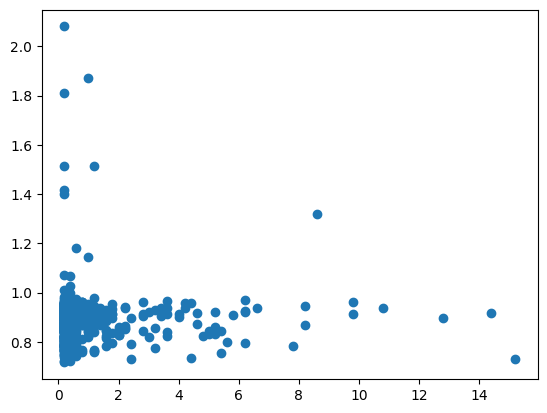

In [127]:
create_model(pluvi_df_nan)

### Replace NaN with Mean, Median and Zero

/tmp/ipykernel_8291/3145835032.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pluvi_df_mean = pluvi_df.fillna(pluvi_df.mean())


mse:  4.5983942534019695
mae:  1.022977133384634


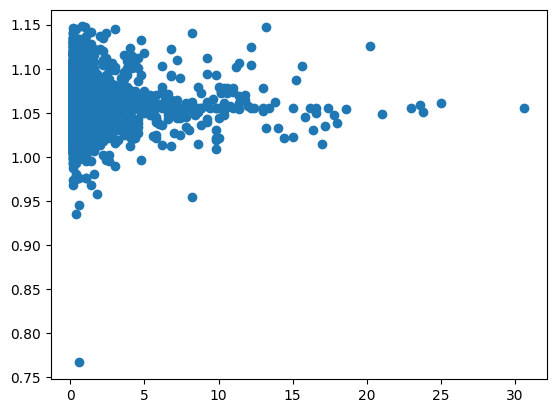

In [128]:
pluvi_df_mean = pluvi_df.fillna(pluvi_df.mean())
create_model(pluvi_df_mean)

/tmp/ipykernel_8291/903789717.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pluvi_df_mean = pluvi_df.fillna(pluvi_df.median())


mse:  4.651222593233326
mae:  1.0435835170991723


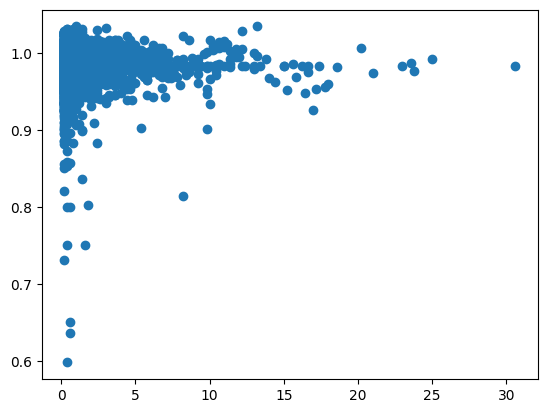

In [129]:
pluvi_df_mean = pluvi_df.fillna(pluvi_df.median())
create_model(pluvi_df_mean)

mse:  4.719049327118926
mae:  1.0600018088836909


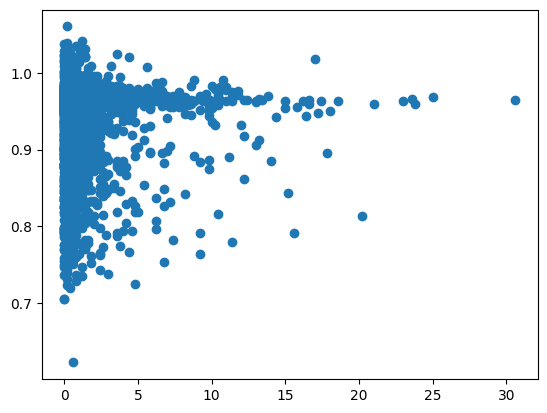

In [130]:
pluvi_df_mean = pluvi_df.fillna(0)
create_model(pluvi_df_mean)

In [131]:
pluvi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13998 entries, 9 to 107134
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     13998 non-null  object 
 1   DBZH    5807 non-null   float64
 2   DBZV    5187 non-null   float64
 3   KDP     2467 non-null   float64
 4   ZDR     13998 non-null  float64
 5   RHOHV   13998 non-null  float64
 6   Tp_est  12525 non-null  float64
dtypes: float64(6), object(1)
memory usage: 874.9+ KB


In [132]:
pluvi_df['Tp_est'].fillna(0, inplace=True)
pluvi_df = pluvi_df.loc[pluvi_df['Tp_est'] != 0]

/tmp/ipykernel_8291/4228587563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluvi_df['Tp_est'].fillna(0, inplace=True)


In [133]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(pluvi_df[['DBZH', 'DBZV', 'KDP', 'ZDR', 'RHOHV']]),columns = ['DBZH', 'DBZV', 'KDP', 'ZDR', 'RHOHV'])

mse:  4.056450380231717
mae:  1.0842434851830685


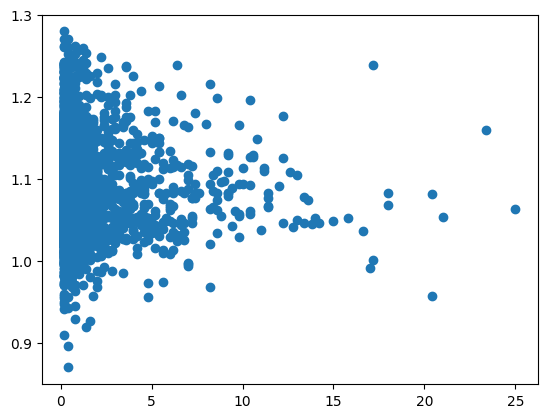

In [134]:
knn_df = df.copy()
knn_df['Tp_est'] = pluvi_df['Tp_est'].values
knn_df['day'] = pluvi_df['day'].values
create_model(knn_df)